<a href="https://colab.research.google.com/github/liang-faan/python-ml/blob/main/SML_1_warmup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SML 1**

**Please "Save A Copy" in your google drive and work with your own copy**

The public dataset is from IBM Watson Analytics. It is about customer attributes and behaviour.

The source is [here](https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data) from Kaggle.

### AutoML Tools
The 2 AutoML tools that we will use are:
1. Exploratory Phase - Pandas Profiling
2. Model Selection Phase - PyCaret

In [ ]:
# Install the two packages
# pandas profiling builds a nice report about the dataset
# pycaret is our autoML package
# pyyaml is a problematic package in colab that conflicts with pandas profiling
# so we install a version that will avoid the conflicts
!pip3 install -U ydata-profiling pycaret[full]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━

Connect your google drive and load the customer_value dataset.

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import python packages that we will be using.

In [ ]:
# import the required packages
import pandas as pd
from pathlib import Path
from pandas_profiling import ProfileReport
from pycaret.regression import *

<ipython-input-2-3c2a2700acb1>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
# Load dataset from Google Drive - customer_value.csv
data_path = Path('/content/drive/MyDrive/pcml_data/5SML/')
filename = 'customer_value.csv'

# Use the read_csv method of pandas and assign the result to a variable called customer_value


In [ ]:
# A quick eyeball on the dataset
customer_value = pd.read_csv(data_path / filename)

In [ ]:
customer_value.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Data Science General Workflow
Every data science project starts with the following workflow

In [ ]:
# Step 1: Source and load your data
df = pd.read_csv(...)

In [ ]:
# Step 2: Wrangle your data
df = df.apply(lambda x: ..., axis=1)

In [ ]:
# Step 3: Inspect the data (exploration)
df.profile_report()

In [ ]:
# Step 4: Perform a first fitting of the models to the data

# Setup the experiment on pycaret
experiment = setup(
    data=df,
    target=...,
    #fix_imbalance=True,
    #data_split_stratify=True
    )

# Fit the models
compare_models()

In [ ]:
# Step 5: Choose the best model
best_model = create_model('xgboost')

In [ ]:
# Step 6a: Analyze the model's performance
evaluate_model(best_model)

In [ ]:
# Step 6b: Explain the model's important features
plot_model(best_model, plot='feature') #which feature is more relavence

In [ ]:
# Step 7 branch - Is the accuracy good enough?
# Branch #1: Not good enough
# ## Look at the features to see what is wrong.
# ## Use stacking and blending techniques; Metamodel(trained models)
# ## Figure out what additional data can be useful
# ## Rinse and repeat from Step 4

# Branch #2: Good enough
# ## look at the features and try to hypothesize why.

In [ ]:
# Step 8: Tune the model
tuned_model = tune_model(...)

In [ ]:
# Step 9: Validate the model on the test set
predict_model(tuned_model)

In [ ]:
# Step 10: Retrain the model using all the data
final_model = finalize_model(...)

In [ ]:
# Step 10: Save the model
save_model(final_model, 'final_model_2023_03_30_18_30')

In [ ]:
# Step 11: Create a dashboard and load the model into the script
loaded_model = load_model('best_model_2023_03_30_18_30')

### Explore the data using YData Profiling

In this section, we will do some data exploration to get a feel of the dataset.

In [ ]:
# build the report using ydata profiling
cprofile_report=customer_value.profile_report(minimal = True)

We can also export the profile report to a html file that can be presented at the frontend.

In [ ]:
# Use the to_file method of ydata profiling to export to a html file locally
cprofile_report.to_file("customer_value.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Make a note of which features we don't want:
1. Customer - too unique, no generalizable pattern to learn.
2. Customer Lifetime Value - this is created by the company, lower total claims and higher premium will result in a higher score (this is a causation problem).
3. Response - Respond to marketing campaign may not be a useful generalizable feature.
4. Effective To Date - days/months since effect is a better measure, not the date itself.

### Model Selection and Evaluation
Now, let's see how well we can predict total claims using this set of historical data.

Note 2 important things in the setup:
1. What is the feature name that we want to predict.
2. What are the features that we want/ don't want.

In [ ]:
# setup the model
# https://pycaret.readthedocs.io/en/latest/api/regression.html

regression_model = setup(
    data=customer_value,
    target="Total Claim Amount",
    ignore_features=["Customer","Customer Lifetime Value", "Response", "Effective To Date"],
    numeric_features=["Number of Open Complaints", "Number of Policies"],
    # categorical_features=[""]
)

,Description,Value
0,Session id,1127
1,Target,Total Claim Amount
2,Target type,Regression
3,Original data shape,"(9134, 24)"
4,Transformed data shape,"(9134, 61)"
5,Transformed train set shape,"(6393, 61)"
6,Transformed test set shape,"(2741, 61)"
7,Ignore features,4
8,Ordinal features,1
9,Numeric features,2


In [ ]:
# We can check the predictive features of the training set
# x refers to the features
# y refers to the outcome.
# y train is the train set outcome.
get_config('X_train')
#get_config('y_train')

,State,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
8228,Oregon,Basic,High School or Below,Employed,M,81687,Suburban,Single,61,7,77,0,6,Personal Auto,Personal L2,Offer2,Call Center,Four-Door Car,Medsize
6951,Nevada,Premium,Bachelor,Employed,F,63774,Rural,Divorced,111,18,63,0,1,Personal Auto,Personal L1,Offer2,Agent,Four-Door Car,Medsize
2551,Oregon,Extended,High School or Below,Employed,F,75425,Suburban,Married,123,3,49,0,6,Personal Auto,Personal L1,Offer1,Branch,Sports Car,Large
2610,Arizona,Basic,College,Employed,M,50825,Urban,Married,102,3,46,0,3,Personal Auto,Personal L1,Offer1,Agent,SUV,Medsize
7048,Oregon,Premium,High School or Below,Employed,M,57449,Suburban,Single,103,6,28,0,2,Personal Auto,Personal L2,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,Oregon,Basic,Master,Employed,F,60415,Rural,Divorced,62,10,31,0,5,Personal Auto,Personal L3,Offer2,Branch,Two-Door Car,Small
8221,Arizona,Basic,High School or Below,Unemployed,F,0,Suburban,Divorced,119,3,11,1,8,Personal Auto,Personal L3,Offer2,Branch,SUV,Large
6051,Oregon,Basic,High School or Below,Employed,F,79440,Urban,Divorced,117,11,19,0,8,Personal Auto,Personal L3,Offer4,Web,SUV,Medsize
3637,Oregon,Basic,Bachelor,Unemployed,M,0,Suburban,Single,73,29,14,0,1,Personal Auto,Personal L2,Offer1,Agent,Two-Door Car,Medsize


In [ ]:
# What are the available models in pycaret's regression module?
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
# What evaluation metrics can we use?
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Custom
ID,,,,,,,,
mae,MAE,MAE,<function mean_absolute_error at 0x7f0ca4f62dc0>,neg_mean_absolute_error,pred,{},False,False
mse,MSE,MSE,<function mean_squared_error at 0x7f0ca4f62f70>,neg_mean_squared_error,pred,{},False,False
rmse,RMSE,RMSE,<function mean_squared_error at 0x7f0ca4f62f70>,neg_root_mean_squared_error,pred,{'squared': False},False,False
r2,R2,R2,<function r2_score at 0x7f0ca4f69280>,r2,pred,{},True,False
rmsle,RMSLE,RMSLE,<function RMSLEMetricContainer.__init__.<local...,"make_scorer(root_mean_squared_log_error, great...",pred,{},False,False
mape,MAPE,MAPE,<function MAPEMetricContainer.__init__.<locals...,"make_scorer(mean_absolute_percentage_error, gr...",pred,{},False,False


In [ ]:
# Run all the models under "Turbo" on the dataset
# Pycaret auto ranks the models based on accuracy criteria in sort

compare_models(sort='MAPE')
#compare_models(sort='MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,77.2278,14262.4903,119.1402,0.8341,0.4627,0.7931,3.7150
rf,Random Forest Regressor,76.5473,14230.2833,119.0102,0.8345,0.4522,0.7965,3.9260
dt,Decision Tree Regressor,97.4066,27730.0416,166.1747,0.6767,0.6065,0.8088,0.2270
lightgbm,Light Gradient Boosting Machine,77.9928,14551.2469,120.2944,0.8309,0.4622,0.8204,0.8980
gbr,Gradient Boosting Regressor,79.9762,14742.7045,121.2104,0.8286,0.4653,0.8262,1.7050
et,Extra Trees Regressor,79.6337,16081.2659,126.3870,0.8134,0.4637,0.8419,3.7830
xgboost,Extreme Gradient Boosting,79.8457,15871.9703,125.7471,0.8152,0.4805,0.9251,1.4210
lr,Linear Regression,96.9858,20131.1352,141.7153,0.7663,0.6853,0.9457,0.8440
ridge,Ridge Regression,96.9672,20127.4175,141.7028,0.7663,0.6843,0.9459,0.2640
lasso,Lasso Regression,96.6312,20066.2020,141.4958,0.7670,0.6854,0.9493,0.6920


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

To train a model and inspect its 10-fold cross-validation, we can use the create_model function in pycaret and specify which model we want.

The result is a trained ML model object that we can eventually save as a model file.

In [ ]:
# create a model based linear regression
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,98.1564,20119.7267,141.8440,0.7503,0.5973,0.5254
1,91.7839,17805.7736,133.4383,0.7880,0.7202,0.7648
2,93.7447,17723.1504,133.1283,0.7752,0.7023,0.5031
3,95.7996,19239.9981,138.7083,0.7839,0.7045,2.9261
4,97.7478,20881.4001,144.5040,0.7723,0.6752,1.4891
5,97.2816,17672.2777,132.9371,0.7741,0.7553,0.7892
6,98.6049,20249.8165,142.3019,0.7724,0.6297,0.5647
7,98.1617,23477.4570,153.2236,0.7356,0.6749,0.6528
8,99.2889,21198.4279,145.5968,0.7523,0.6745,0.6138


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# create a model based on decision tree regressor
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,98.8689,27981.5803,167.2770,0.6527,0.5843,0.6395
1,98.3630,28106.2436,167.6492,0.6654,0.5645,0.9163
2,91.6295,22402.2846,149.6739,0.7159,0.5896,0.4752
3,99.5373,35191.2686,187.5934,0.6046,0.6572,2.0101
4,96.5143,25103.9364,158.4422,0.7262,0.6247,1.1018
5,99.9684,29355.5874,171.3347,0.6248,0.6114,0.5601
6,91.4622,24097.6592,155.2342,0.7292,0.6227,0.5359
7,91.6164,26491.3301,162.7616,0.7017,0.6121,0.6484
8,111.2732,32376.5740,179.9349,0.6217,0.6043,0.6569


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# create a model based on an ensemble regressor
rf = create_model('xgboost')
# R2 -> how much the data explained by model.

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,76.0352,14817.6113,121.7276,0.8161,0.4516,0.5817
1,76.5502,14417.6094,120.0733,0.8284,0.4494,0.6177
2,77.9157,14981.0801,122.3972,0.8100,0.4399,0.4270
3,83.3363,17839.8535,133.5659,0.7996,0.5723,3.6213
4,75.3048,13547.6240,116.3943,0.8522,0.4819,0.9023
5,83.1551,15213.6318,123.3436,0.8055,0.5351,0.6958
6,79.3849,14571.0488,120.7106,0.8363,0.4551,0.5117
7,83.6451,20687.9785,143.8332,0.7670,0.5052,0.5897
8,85.5507,17173.2480,131.0467,0.7994,0.4307,0.4640


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Check the accuracy on the test set
predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,78.6278,15385.8604,124.0398,0.8080,0.4407,0.4606


,State,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Amount,prediction_label
1050,Arizona,Basic,High School or Below,Employed,M,51978,Rural,Married,66,18,...,0,1,Corporate Auto,Corporate L3,Offer2,Agent,Four-Door Car,Medsize,144.782150,78.495720
4223,Arizona,Extended,College,Employed,F,52982,Rural,Divorced,89,8,...,0,3,Corporate Auto,Corporate L3,Offer1,Call Center,Four-Door Car,Medsize,31.356274,116.256447
1439,California,Premium,Bachelor,Employed,M,68164,Rural,Single,119,27,...,2,6,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Small,222.582870,175.753113
1333,Arizona,Premium,High School or Below,Employed,M,40117,Suburban,Married,108,6,...,0,2,Personal Auto,Personal L1,Offer3,Agent,Two-Door Car,Small,750.082764,625.978516
3773,Oregon,Premium,College,Unemployed,F,0,Suburban,Single,111,29,...,0,3,Personal Auto,Personal L1,Offer2,Agent,Two-Door Car,Medsize,532.799988,835.556396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7936,Arizona,Basic,Bachelor,Employed,F,64543,Urban,Married,65,1,...,0,2,Personal Auto,Personal L3,Offer2,Call Center,Four-Door Car,Medsize,200.177170,232.006058
4807,Washington,Extended,High School or Below,Unemployed,M,0,Suburban,Single,89,4,...,0,4,Personal Auto,Personal L2,Offer1,Agent,Four-Door Car,Medsize,941.347473,650.836731
1857,Arizona,Extended,High School or Below,Disabled,F,22081,Suburban,Married,84,1,...,0,6,Personal Auto,Personal L1,Offer1,Agent,Two-Door Car,Small,451.670319,454.926575
3990,Oregon,Basic,Bachelor,Unemployed,M,0,Suburban,Married,64,32,...,1,3,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Small,307.200012,338.440002


In [ ]:
get_config()

In [ ]:
# The difference between giving a dataframe to predict_model vs not giving
customer_value_test = customer_value.iloc[200];
# customer_value_test.drop('Customer','Total Claim Amount', inplace=True, axis=1);
customer_value_test_df = customer_value_test.to_frame();
# customer_value_test_df.transpose()
customer_value_test_df.drop(['Customer', "Customer Lifetime Value", "Response", "Effective To Date", 'Total Claim Amount'], inplace=True)
# customer_value_test_df.drop(columns=customer_value_test_df.columns[0], axis=1, inplace=True)
# Example 2: Use DataFrame.drop() function to delete first row
# customer_value_test_df.drop(index=customer_value_test_df.index[0], axis=0, inplace=True)

customer_value_test_df = customer_value_test_df.transpose();
# predict_model(rf,customer_value_test_df)

KeyError: ignored

In [ ]:
# Check the predicted values for each observation in the test set
errors =

In [ ]:
# Check MAPE calculation


In [ ]:
# Create custom metrics
# ## MAPD

### Feature Importances

Investigate the important features of the best model and the most common model in statistics - the Linear Regression.

Which one make better sense?

In [ ]:
# force the plot to show
%matplotlib inline

In [ ]:
# plot the model to take a look at the feature importance
# ## Use the linear regression model
plot_model(lr, plot='feature')

In [ ]:
# ## Try the decision tree model
plot_model(dt, plot='feature')

In [ ]:
# ## More analytics (evaluate)
plot_model(rf, plot='feature')

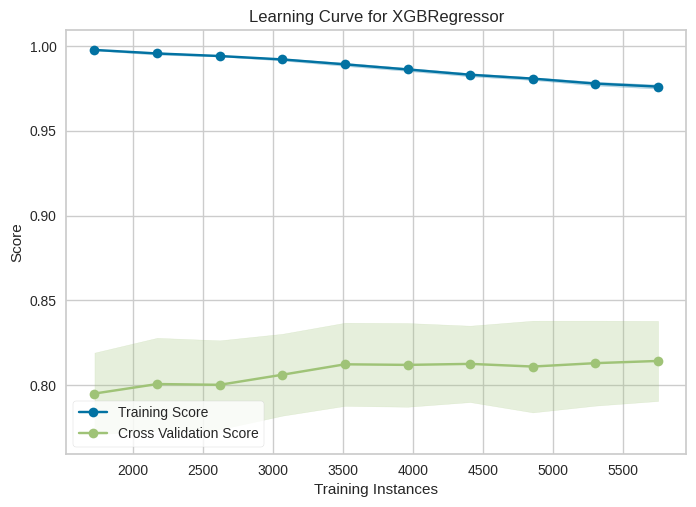

In [ ]:
# ## Tune the model
#evaluate_model(rf)

plot_model(rf, plot='learning')
# if the model benfit with data, it will increasing cross validation score
# add more features to fix the flat cross valication score.
# if the cross validation score to incrase, get more features.

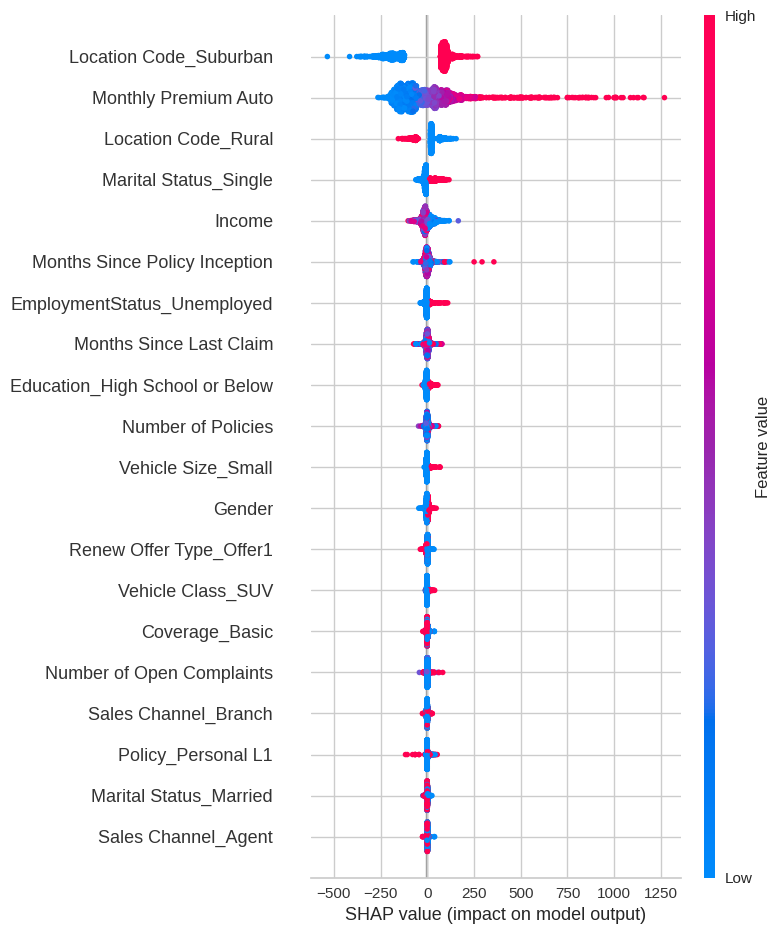

In [ ]:
# Plot the SHAP interpretation of the model
# show the magtitue and the direction (correlation) and the feature against the outcome
# more right, higher impact
interpret_model(rf)

In [ ]:
#Finalize model
final_model = finalize_model(rf)
# Recall that we split the data into training and test sets
# After we are satisfied with the test accuracy, we are ready to
# use the model from this point forward

# Since ML accuracy generally would improve with more data, we should
# deploy a model that is trained with the full dataset, and not the one
# that is only fitted on training data (only 70% of the full dataset)

# Retrain the model with the full dataset

In [ ]:
#Tune model with little bit more performance
tune_model = tune_model(
    rf,
    choose_better=True,
    search_library="optuna",
    n_iter=100,
    optimizer='MAPE',
    earch_stopping=True
    )

In [ ]:
predict_model(final_model)
# This is to demostrate the model has seen the test data during the training
# the correct metrics to report is the one above

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,39.4586,3294.7639,57.4000,0.9589,0.3040,0.2512


,State,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Amount,prediction_label
1050,Arizona,Basic,High School or Below,Employed,M,51978,Rural,Married,66,18,...,0,1,Corporate Auto,Corporate L3,Offer2,Agent,Four-Door Car,Medsize,144.782150,73.553406
4223,Arizona,Extended,College,Employed,F,52982,Rural,Divorced,89,8,...,0,3,Corporate Auto,Corporate L3,Offer1,Call Center,Four-Door Car,Medsize,31.356274,46.386059
1439,California,Premium,Bachelor,Employed,M,68164,Rural,Single,119,27,...,2,6,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Small,222.582870,230.588196
1333,Arizona,Premium,High School or Below,Employed,M,40117,Suburban,Married,108,6,...,0,2,Personal Auto,Personal L1,Offer3,Agent,Two-Door Car,Small,750.082764,670.253052
3773,Oregon,Premium,College,Unemployed,F,0,Suburban,Single,111,29,...,0,3,Personal Auto,Personal L1,Offer2,Agent,Two-Door Car,Medsize,532.799988,703.593079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7936,Arizona,Basic,Bachelor,Employed,F,64543,Urban,Married,65,1,...,0,2,Personal Auto,Personal L3,Offer2,Call Center,Four-Door Car,Medsize,200.177170,213.916779
4807,Washington,Extended,High School or Below,Unemployed,M,0,Suburban,Single,89,4,...,0,4,Personal Auto,Personal L2,Offer1,Agent,Four-Door Car,Medsize,941.347473,770.335999
1857,Arizona,Extended,High School or Below,Disabled,F,22081,Suburban,Married,84,1,...,0,6,Personal Auto,Personal L1,Offer1,Agent,Two-Door Car,Small,451.670319,469.777557
3990,Oregon,Basic,Bachelor,Unemployed,M,0,Suburban,Married,64,32,...,1,3,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Small,307.200012,367.449158


In [ ]:
# Recall that we split the data into training and test sets
# After we are satisfied with the test accuracy, we are ready to
# use the model from this point forward

# Since ML accuracy generally would improve with more data, we should
# deploy a model that is trained with the full dataset, and not the one
# that is only fitted on training data (only 70% of the full dataset)

# Retrain the model with the full dataset


In [ ]:
import datetime

# Save the trained model as a file
# We can install pycaret in other computers, load this model file, and
# get the trained model capability

# Always version your file, easiest is by datetime. Use f-string to automate
# the naming process
model_filename = f'total_claims_model_62_1_{datetime.datetime.now()}'
save_model(final_model, model_filename)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Number of Open Complaints',
                                              'Number of Policies'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['State', 'Coverage', 'Education',
                                              'EmploymentStatus', 'Gender',
                                              'Location Code', 'Marital Status',
                                              'Policy Type', 'Policy',
                                              'Renew O...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=

### Deploying the model

Deploying the model requires some understanding about software engineering.

Typically, data scientist/analyst pass the model file and a schema of the input and output to the software engineer.

What is an input schema? Its simply the set of data that the model ingest as input.

In [ ]:
# Extracting an observation from the original dataset
# The loaded model file can give a prediction if the following features
# are given.
customer_value.iloc[0]

The above is a pandas representation of an input. Generally, software applications uses a data schema known as json.

Note that json looks exactly like a python dictionary.

In [ ]:
# This is how the same data looks like in json
customer_value.iloc[0].to_json()

'{"Customer":"BU79786","State":"Washington","Customer Lifetime Value":2763.519279,"Response":"No","Coverage":"Basic","Education":"Bachelor","Effective To Date":"2\\/24\\/11","EmploymentStatus":"Employed","Gender":"F","Income":56274,"Location Code":"Suburban","Marital Status":"Married","Monthly Premium Auto":69,"Months Since Last Claim":32,"Months Since Policy Inception":5,"Number of Open Complaints":0,"Number of Policies":1,"Policy Type":"Corporate Auto","Policy":"Corporate L3","Renew Offer Type":"Offer1","Sales Channel":"Agent","Total Claim Amount":384.811147,"Vehicle Class":"Two-Door Car","Vehicle Size":"Medsize"}'

To use the model, the AI application that the software engineer built must pass data in the above format to the model, and the model will give the predicted result.

In [ ]:
simulated_input = {
    "State": "Washington",
    "Coverage": "Basic",
    "Education": "Bachelor",
    "EmploymentStatus": "Employed",
    "Gender": "F",
    "Income": 60000,
    "Location Code": "Suburban",
    "Marital Status": "Married",
    "Monthly Premium Auto": 75,
    "Months Since Last Claim": 12,
    "Months Since Policy Inception": 7,
    "Number of Open Complaints": 1,
    "Number of Policies": 3,
    "Policy Type": "Corporate Auto",
    "Policy": "Corporate L3",
    "Renew Offer Type": "Offer1",
    "Sales Channel": "Agent",
    "Vehicle Class": "Two-Door Car",
    "Vehicle Size": "Medsize"}

To use the model's prediction function, we need to wrap the input as a pandas dataframe.

We can easily convert dictionaries to pandas dataframes through pd.DataFrame([{...}, {...]). This will take care of the feature names as well, so we don't need to worry about the order of the features.

In [ ]:
input_data = pd.DataFrame([simulated_input])

In [ ]:
# Load the model
# need software engineer to install python and corresponding package
loaded_model= load_model('/content/total_claims_model_62_1_2023-03-31 13:51:34.687503')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
# Use the loaded model to predict the input
predict_model(loaded_model, input_data)

,State,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,prediction_label
0,Washington,Basic,Bachelor,Employed,F,60000,Suburban,Married,75,12,7,1,3,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,396.901733
